<a href="https://colab.research.google.com/github/MANOFURA/Ciencia-de-Dados/blob/main/ETL_Arquivo_de_Insights_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# \# Projeto de visitas ao total em São Paulo 2025 (ETL com Python)

# 📊 Projeto ETL: Análise de Estratégia Turística - São Paulo 2025

## 1. Contexto do Negócio
**O Cliente:** Secretaria de Turismo do Estado de São Paulo.
**O Cenário:** Com a aproximação da alta temporada de Dezembro de 2025, a prefeitura necessita de inteligência de dados para planejar a alocação de recursos (segurança, trânsito e limpeza).
**O Problema:** Os dados atuais de previsão de público estão fragmentados por local específico, dificultando a visão macroscópica de quais *tipos* de turismo (Cultural, Parques, Gastronomia) demandarão mais atenção.

**O Objetivo deste Notebook:**
Executar um pipeline **ETL (Extract, Transform, Load)** para:
1.  **Extrair** os dados brutos de visitação.
2.  **Transformar** os dados, corrigindo inconsistências e agrupando por categorias estratégicas.
3.  **Carregar** os insights em um relatório visual para a tomada de decisão da diretoria.



## **E**xtract

Extrair os dados brutos de visitação.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('turismo_sp_dez2025.csv', on_bad_lines='skip')
print(df.head())

   Rank    Ponto_Turistico    Categoria    Zona  Publico_Estimado_Dez  \
0     1  Parque Ibirapuera       Parque     Sul               1200000   
1     2   Avenida Paulista       Urbano  Centro                950000   
2     3  Mercado Municipal  Gastronomia  Centro                450000   
3     4     Catedral da Sé    Religioso  Centro                300000   
4     5     Beco do Batman     Cultural   Oeste                280000   

   Ticket_Medio  
0             0  
1             0  
2            50  
3             0  
4             0  


## **Transform**

Transformar os dados, corrigindo inconsistências e agrupando por categorias estratégicas.

In [24]:
# Soma os públicos por categoria
df_categoria = df.groupby('Categoria')['Publico_Estimado_Dez'].sum().reset_index()

# Ordena do maior para o menor (Ascending=True no barh faz o maior ficar no topo visualmente ou base, dependendo da lib, aqui garante ordem de tamanho)
df_categoria = df_categoria.sort_values(by='Publico_Estimado_Dez', ascending=True)

# CALCULA O TOTAL GERAL (A SOMA DE TUDO)
total_geral = df['Publico_Estimado_Dez'].sum()

## **Load**

Carregar os insights em um relatório visual para a tomada de decisão da diretoria.

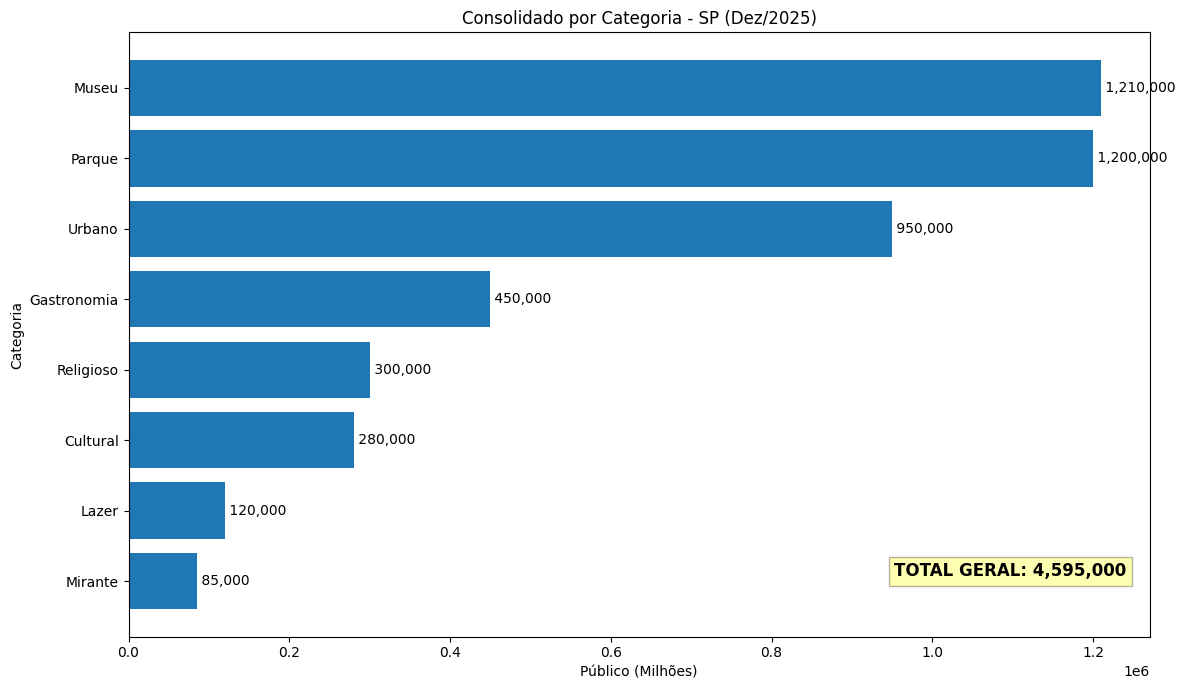

In [26]:
plt.figure(figsize=(12, 7))

# Cria o gráfico
plt.barh(df_categoria['Categoria'], df_categoria['Publico_Estimado_Dez'], color='#1f77b4')

# Títulos e Labels
plt.xlabel('Público (Milhões)')
plt.ylabel('Categoria')
plt.title('Consolidado por Categoria - SP (Dez/2025)')

# --- AQUI ESTÁ O TRUQUE PARA MOSTRAR O TOTAL ---
# Colocamos um texto flutuante no gráfico
plt.text(0.75, 0.1,                          # Posição X, Y (0 a 1 em relação ao tamanho do gráfico)
         f'TOTAL GERAL: {total_geral:,.0f}', # O Texto formatado
         transform=plt.gca().transAxes,      # Diz que a posição é relativa aos eixos
         fontsize=12, fontweight='bold',     # Estilo
         bbox=dict(facecolor='yellow', alpha=0.3)) # Caixinha amarela de fundo

# Coloca os valores na frente de cada barra
for index, value in enumerate(df_categoria['Publico_Estimado_Dez']):
    plt.text(value, index, f' {value:,.0f}', va='center')

plt.tight_layout()
plt.show()